In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
cwd = os.getcwd()
print(cwd)
path = cwd+'/FruitRecognization/'


/content


In [ ]:
batch_size = 32
img_height = 224
img_width = 224



In [ ]:
# TRAIN_DIR =cwd+'/FruitRecognization/train/'  
# TEST_DIR =cwd+'/FruitRecognization/test/'
# VALID_DIR =cwd+'/FruitRecognization/validation/'
TEST_DIR = '/content/drive/MyDrive/FruitRecognization/test'
TRAIN_DIR ='/content/drive/MyDrive/FruitRecognization/train'
VALID_DIR ='/content/drive/MyDrive/FruitRecognization/validation'


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(TRAIN_DIR,
                                                               seed=2509,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 3408 files belonging to 36 classes.


In [ ]:
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(VALID_DIR,
                                                               seed=2509,
                                                               image_size=(img_height, img_width),
                                                               shuffle=False,
                                                               batch_size=batch_size)

Found 351 files belonging to 36 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(TEST_DIR,
                                                              seed=2509,
                                                              image_size=(img_height, img_width),
                                                              shuffle=False,
                                                              batch_size=batch_size)

Found 359 files belonging to 36 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


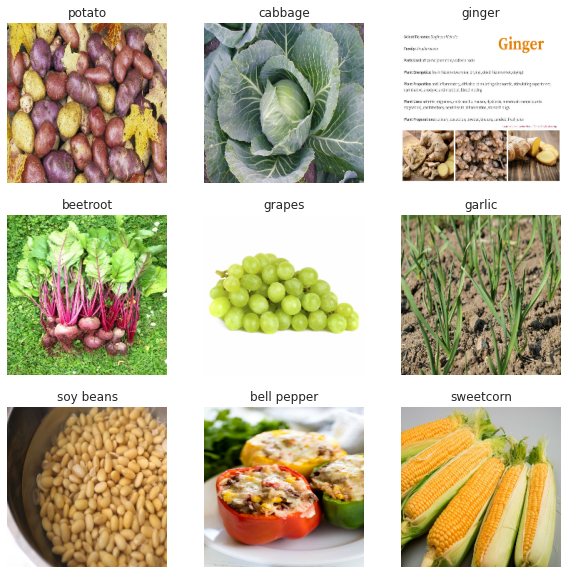

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

In [ ]:
inputs = tf.keras.Input(shape=(224,224,3))
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = data_augmentation(x)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
x = tf.keras.layers.Dense(len(class_names),activation='softmax')(x)

In [ ]:
model = tf.keras.Model(inputs=inputs, outputs=x, name="flower_vegetable_Detection_MobileNetV2")

In [ ]:
# Compile the model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "flower_vegetable_Detection_MobileNetV2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)               

In [ ]:
initial_epochs = 5


In [ ]:
# Fit the model
history = model.fit(x=train_ds,
                    epochs= initial_epochs,
                    validation_data=valid_ds)

Epoch 1/5
107/107 [==============================] - 1213s 11s/step - loss: 2.1778 - accuracy: 0.4285 - val_loss: 0.5264 - val_accuracy: 0.8433
Epoch 2/5
107/107 [==============================] - 231s 2s/step - loss: 0.9176 - accuracy: 0.7029 - val_loss: 0.3554 - val_accuracy: 0.8889
Epoch 3/5
107/107 [==============================] - 231s 2s/step - loss: 0.6971 - accuracy: 0.7671 - val_loss: 0.2892 - val_accuracy: 0.8946
Epoch 4/5
107/107 [==============================] - 232s 2s/step - loss: 0.5915 - accuracy: 0.8021 - val_loss: 0.3094 - val_accuracy: 0.8917
Epoch 5/5
107/107 [==============================] - 232s 2s/step - loss: 0.4811 - accuracy: 0.8476 - val_loss: 0.2330 - val_accuracy: 0.9003


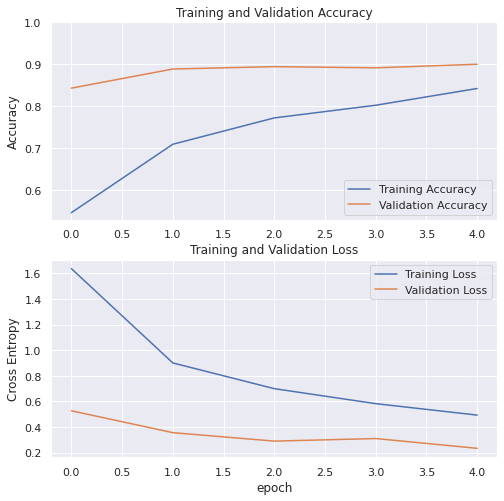

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Compile the model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(1e-5),
    metrics = ["accuracy"])

In [ ]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=valid_ds)

Epoch 5/10
107/107 [==============================] - 584s 5s/step - loss: 0.3298 - accuracy: 0.8841 - val_loss: 0.2005 - val_accuracy: 0.9316
Epoch 6/10
107/107 [==============================] - 574s 5s/step - loss: 0.2588 - accuracy: 0.9112 - val_loss: 0.1838 - val_accuracy: 0.9345
Epoch 7/10
107/107 [==============================] - 570s 5s/step - loss: 0.2513 - accuracy: 0.9095 - val_loss: 0.1908 - val_accuracy: 0.9316
Epoch 8/10
107/107 [==============================] - 570s 5s/step - loss: 0.2124 - accuracy: 0.9274 - val_loss: 0.1947 - val_accuracy: 0.9402
Epoch 9/10
107/107 [==============================] - 570s 5s/step - loss: 0.1917 - accuracy: 0.9416 - val_loss: 0.1776 - val_accuracy: 0.9259
Epoch 10/10
107/107 [==============================] - 570s 5s/step - loss: 0.1805 - accuracy: 0.9382 - val_loss: 0.1376 - val_accuracy: 0.9459


In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

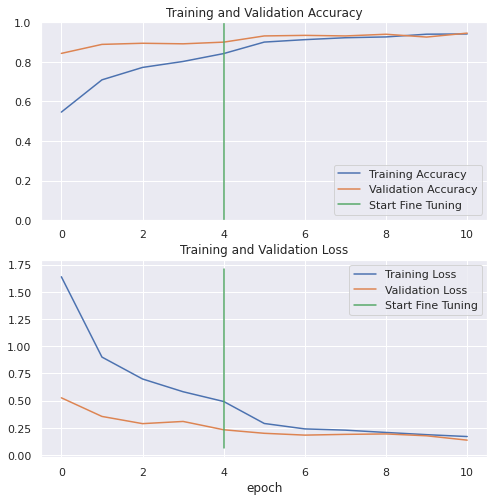

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Make prediction on the validation data (not used to train on)
predictions = model.predict(valid_ds, verbose=1)

11/11 [==============================] - 22s 2s/step


In [ ]:
predictions.shape

(351, 36)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
predictions[0]

array([9.9008709e-01, 1.4741795e-11, 2.1011515e-06, 2.8158426e-10,
       6.3173192e-13, 1.2468318e-07, 6.3411383e-09, 1.2897475e-10,
       8.1612400e-10, 3.1162399e-11, 4.9495991e-10, 1.7807174e-08,
       2.2827768e-13, 2.5709483e-11, 1.8842416e-08, 2.9750489e-09,
       8.2086720e-09, 2.5296729e-09, 2.2434979e-12, 8.3231444e-06,
       3.9838395e-07, 4.6467881e-06, 3.5071763e-09, 5.9171644e-04,
       2.9252819e-11, 1.5270138e-09, 9.2143528e-03, 6.9657464e-05,
       2.6735012e-07, 4.5454304e-10, 5.7013687e-13, 5.3319519e-11,
       9.6058336e-08, 2.0419522e-05, 2.2351939e-07, 4.4481015e-07],
      dtype=float32)

In [ ]:
class_names[np.argmax(predictions[0])]

'apple'

In [ ]:
class_names[np.argmax(predictions[15])]

'banana'

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(36,), dtype=float32, numpy=
array([0.07138906, 0.0265242 , 0.02652426, 0.0265242 , 0.0265242 ,
       0.0265242 , 0.0265242 , 0.0265242 , 0.0265242 , 0.0265242 ,
       0.0265242 , 0.0265242 , 0.0265242 , 0.0265242 , 0.0265242 ,
       0.0265242 , 0.0265242 , 0.0265242 , 0.0265242 , 0.02652442,
       0.02652421, 0.02652432, 0.0265242 , 0.0265399 , 0.0265242 ,
       0.0265242 , 0.02676973, 0.02652605, 0.02652421, 0.0265242 ,
       0.0265242 , 0.0265242 , 0.0265242 , 0.02652474, 0.02652421,
       0.02652421], dtype=float32)>

In [ ]:
np.save('class_names.npy',class_names)


In [ ]:
model.save("flower_vegetable_detection_mobilenetv2.h5")

In [ ]:
model.evaluate(test_ds)

12/12 [==============================] - 114s 10s/step - loss: 0.1368 - accuracy: 0.9471


[0.1368027925491333, 0.9470751881599426]